# Modelo predictivo de Temperatura Superficial Marina utilizando Suavizado Exponencial

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore") 
%matplotlib inline

## Primero se importan los datos (NASA) de temperatura superficial Marina, para posteriormente agregar fechas y gráficar.

<AxesSubplot: title={'center': 'Temperatura Superfical Marina'}, xlabel='Fecha', ylabel='Temperatura(°C)'>

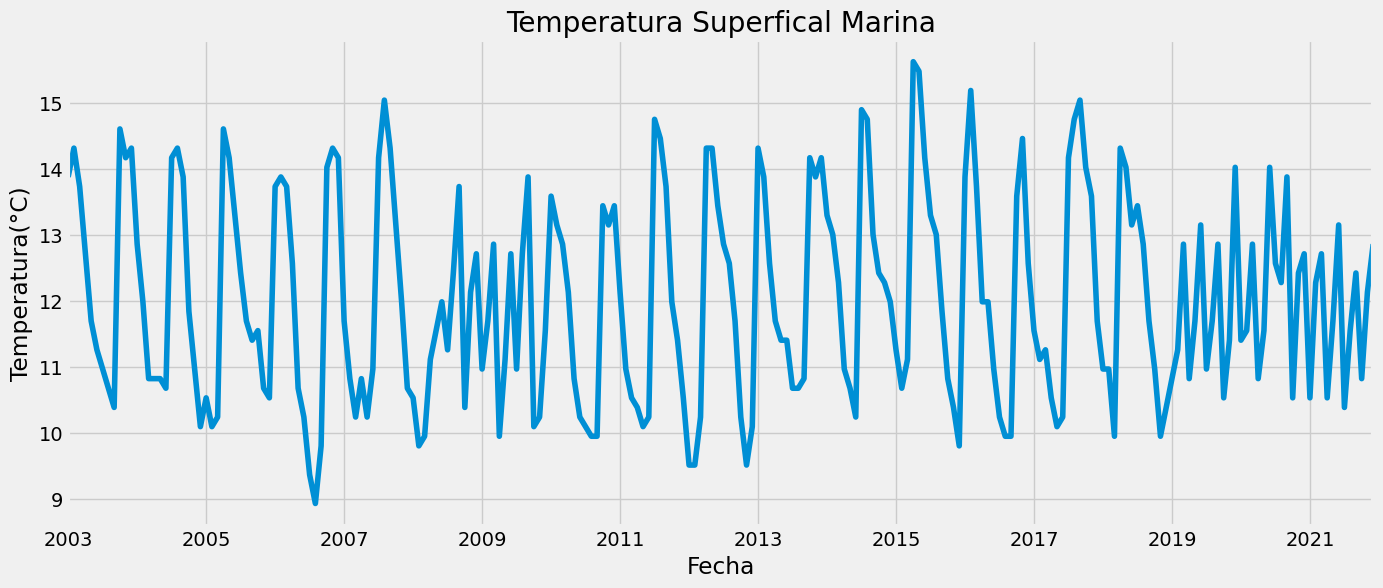

In [44]:
data= np.loadtxt("MYD28M2.dat", unpack = True)
fechas = pd.date_range(start='2003-01', end='2022-1',freq = 'M').strftime('%Y-%m')
df = pd.DataFrame({'datetime': fechas , 'data' :data})
df = df.set_index('datetime')
df.index = pd.to_datetime(df.index)
df.plot(legend=False, xlabel='Fecha' , ylabel= 'Temperatura(°C)' , title='Temperatura Superfical Marina'
,figsize=(15,6))

## Se genera una descomposción de los datos, separando en la tendencia, la repetición anual (estacional) y el ruido.

In [45]:
decomposition = seasonal_decompose(df, model='additive', period=52)

<AxesSubplot: title={'center': 'Temperatura Superfical Marina (Tendencia)'}, xlabel='Fecha', ylabel='Temperatura(°C)'>

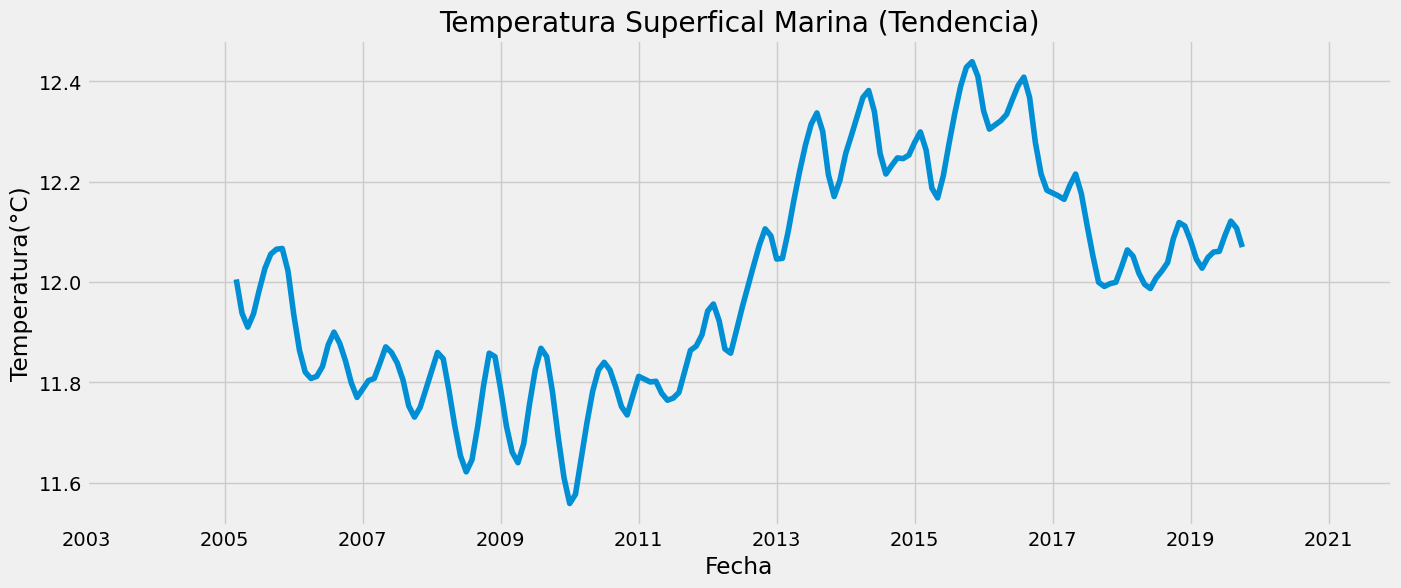

In [46]:
decomposition.trend.plot(legend=False, xlabel='Fecha' , ylabel= 'Temperatura(°C)' , title='Temperatura Superfical Marina (Tendencia)'
,figsize=(15,6))

<AxesSubplot: title={'center': 'Temperatura Superfical Marina (estacional)'}, xlabel='Fecha', ylabel='Temperatura(°C)'>

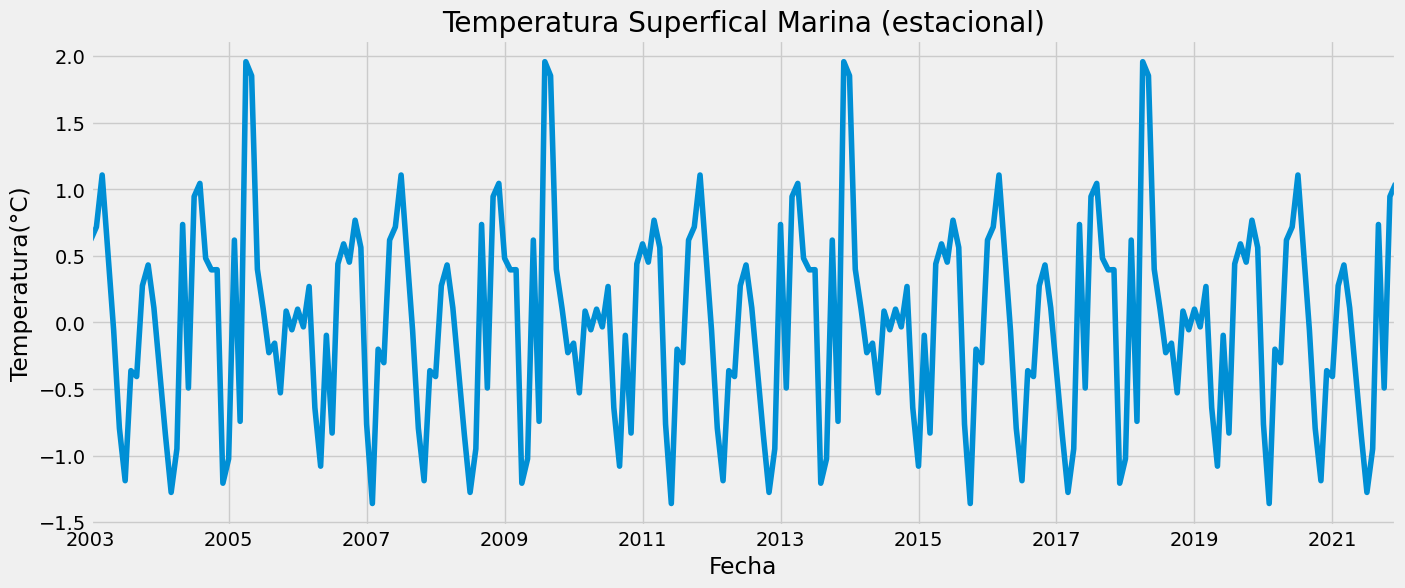

In [47]:
decomposition.seasonal.plot(legend=False, xlabel='Fecha' , ylabel= 'Temperatura(°C)' , title='Temperatura Superfical Marina (estacional)',
                            figsize=(15,6))

<AxesSubplot: title={'center': 'Temperatura Superfical Marina (ruido)'}, xlabel='Fecha', ylabel='Temperatura(°C)'>

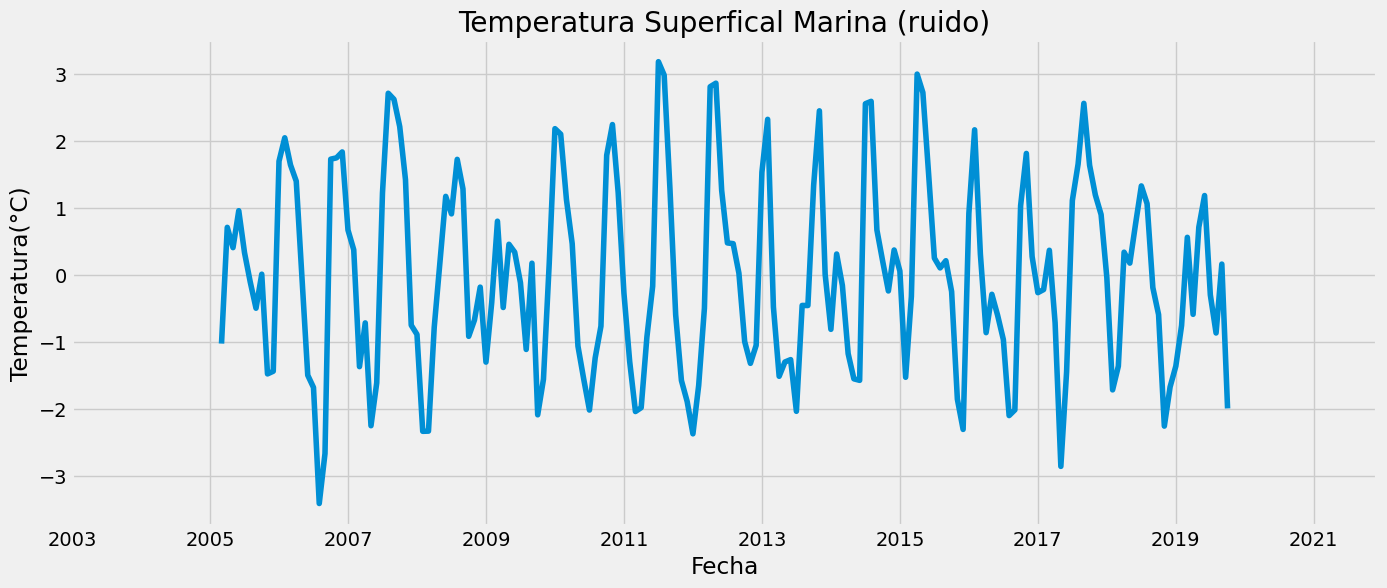

In [48]:
decomposition.resid.plot(legend=False, xlabel='Fecha' , ylabel= 'Temperatura(°C)' , title='Temperatura Superfical Marina (ruido)',
                            figsize=(15,6))

## Se separan los datos creando un set de entrenamiento y otro de testeo considerando enero del 2015 como corte. Posteriormente se genera un modelo tomando la tendencia y la parte estacional de los datos

In [49]:
train = df.loc[df.index < '2015-01']
test = df.loc[df.index >= '2015-01']
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=52)

model_fit = model.fit()

## Gráficamos los reusltados tanto los datos de entrenamiento, de testeo y los resultados predichos

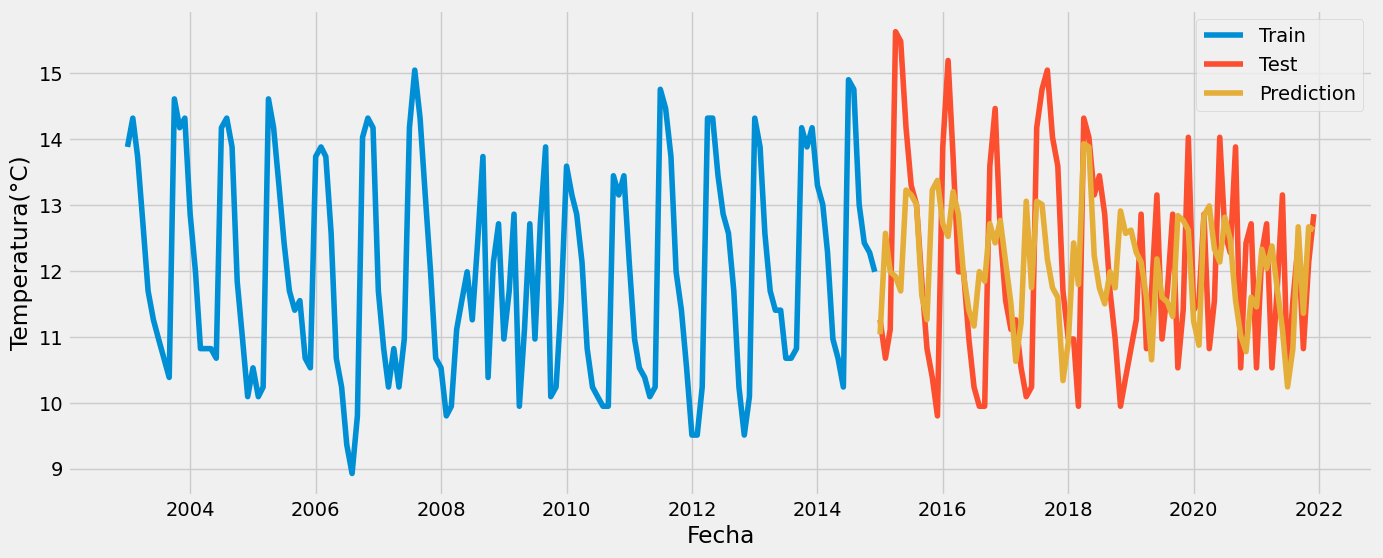

In [50]:
pred = model_fit.predict(start=test.index[0], end=test.index[-1])

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Prediction')
plt.xlabel('Fecha')
plt.ylabel('Temperatura(°C)')
plt.legend(loc='best')

## Imprimimos el error cuadrático medio

In [51]:
score = np.sqrt(mean_squared_error(test, pred))
print(f'Error cuadrático medio: {score:0.2f}')

Error cuadrático medio: 1.50
